In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
G = nx.read_gml('lesmis.gml')

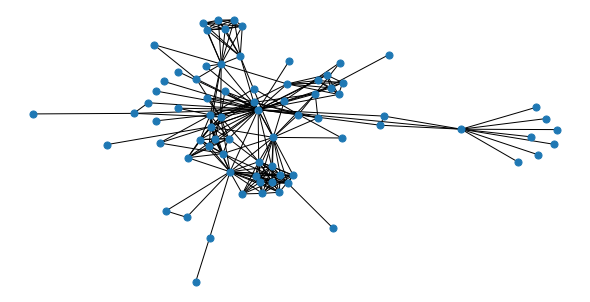

In [3]:
#visualize the network
plt.figure(figsize=(8.0,4.0))
np.random.seed(2011)
nx.draw(G,node_size=50)

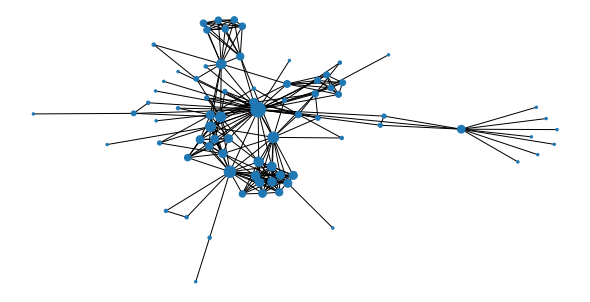

In [4]:
#sizes proportional to node degree
plt.figure(figsize=(8.0,4.0))
np.random.seed(2011)
size_1 = [len(dict(G.adj)[i]) for i in list(G.nodes)]
nx.draw(G, node_size=np.array(size_1)*6)

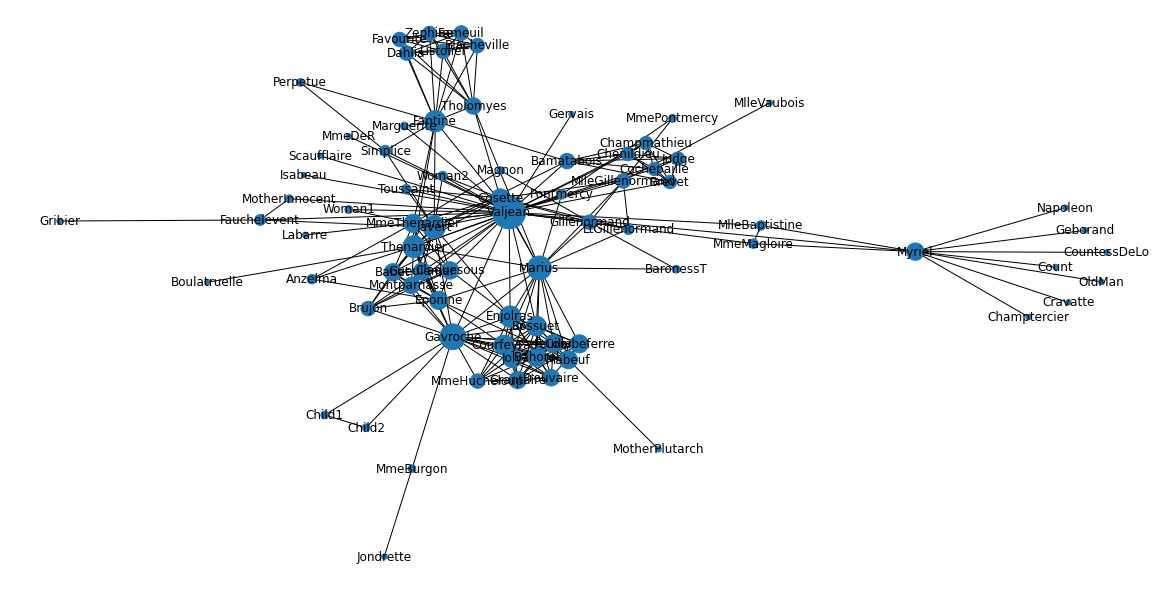

In [11]:
#with mode labels
plt.figure(figsize = (16.0,8.0))
np.random.seed(2011)
nx.draw(G, with_labels=True, node_size=np.array(size_1)*30)

In [6]:
#degree centrality top5 nodes
dc = nx.degree_centrality(G)
dcrank = np.argsort(list(dc.values()))[::-1]
dctop5 = dcrank[:5]
for i in dctop5:
    print("{} {}".format(list(dc.keys())[i],list(dc.values())[i]))

Valjean 0.47368421052631576
Gavroche 0.2894736842105263
Marius 0.25
Javert 0.22368421052631576
Thenardier 0.21052631578947367


In [7]:
#betweeness centrality top5 nodes
bc = nx.betweenness_centrality(G)
bcrank = np.argsort(list(bc.values()))[::-1]
bctop5 = bcrank[:5]
for i in bctop5:
    print("{} {}".format(list(bc.keys())[i], list(bc.values())[i]))

Valjean 0.5699890527836184
Myriel 0.17684210526315788
Gavroche 0.16511250242584766
Marius 0.132032488621946
Fantine 0.12964454098819422


In [8]:
#stability of Pagerank centrality
alphas = np.array([0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
for alpha in alphas:
    pr = nx.pagerank(G, alpha=alpha)
    prrank = np.argsort(list(pr.values()))[::-1]
    prtop5 = prrank[:5]
    print(alpha, [list(pr.keys())[i] for i in prtop5])

0.95 ['Valjean', 'Gavroche', 'Marius', 'Myriel', 'Javert']
0.9 ['Valjean', 'Myriel', 'Gavroche', 'Marius', 'Javert']
0.85 ['Valjean', 'Myriel', 'Gavroche', 'Marius', 'Javert']
0.8 ['Valjean', 'Myriel', 'Gavroche', 'Marius', 'Javert']
0.7 ['Valjean', 'Myriel', 'Gavroche', 'Marius', 'Javert']
0.6 ['Valjean', 'Myriel', 'Gavroche', 'Javert', 'Marius']
0.5 ['Valjean', 'Myriel', 'Gavroche', 'Javert', 'Marius']
0.4 ['Valjean', 'Myriel', 'Gavroche', 'Javert', 'Marius']
0.3 ['Valjean', 'Myriel', 'Gavroche', 'Javert', 'Thenardier']
0.2 ['Valjean', 'Myriel', 'Gavroche', 'Thenardier', 'Javert']
0.1 ['Valjean', 'Myriel', 'Gavroche', 'Thenardier', 'Javert']


Mostly stable in [0.7,0.8,0.85,0.9]